<a href="https://colab.research.google.com/github/Binabrata/Quantum/blob/main/SuperdenseCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

In [2]:
!pip install qiskit-aer

In [3]:
!pip install pylatexenc

In [4]:
import qiskit

In [5]:
qiskit.__version__

'1.2.0'

In [6]:
qiskit.version.get_version_info()

'1.2.0'

In [7]:
from qiskit import __version__
print(__version__)

1.2.0


In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [9]:
# Eve - Creates Entangled State
def create_entangle_state(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control and the second qubit as target

In [10]:
# Alice
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass                  # To send 00 Alice will not do anything, imagine apply an Identity gate
    elif msg == "10":
        qc.x(qubit)           # To send 10 Alice apply an X-gate on the qubit which Alice receive from Eve and send to Bob after applying the X gate
    elif msg == "01":
        qc.z(qubit)           # To send 01 Alice apply an Z-gate on the qubit which Alice receive from Eve and send to Bob after applying the Z gate
    elif msg == "11":
        qc.z(qubit)           # To send 11 Alice apply an Z-gate followed by an X-gate on the qubit which Alice receive from Eve and send to Bob after applying the Z-gate followed by X-gate
        qc.x(qubit)
    else:
        print("Invalid Message: Alice Sending '00' to Bob")

In [11]:
# Bob - Decodes the message that Bob received from Alice by disentangled state
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [12]:
def createSuperdenceCodingCircuit(message):
    # Create the quantum circuit with 2 qubits
    qc = QuantumCircuit(2)

    # First, Eve creates the entangled pair and shares qubit 0 to Alice and qubit 1 to Bob
    create_entangle_state(qc, 0, 1)
    qc.barrier() # This adds a barrier in the circuit.

    # Next, Alice encodes her message onto qubit 0.
    encode_message(qc, 0, message)
    qc.barrier() # This adds a barrier in the circuit.

    # Alice then sends her qubit to Bob. After recieving qubit 0, Bob decodes the message sent by Alice by disentagled the qubits
    decode_message(qc, 0, 1)

    # Finally, Bob measures his qubits to read Alice's message
    qc.measure_all()

    #%matplotlib inline

    # Draw our output
    return qc

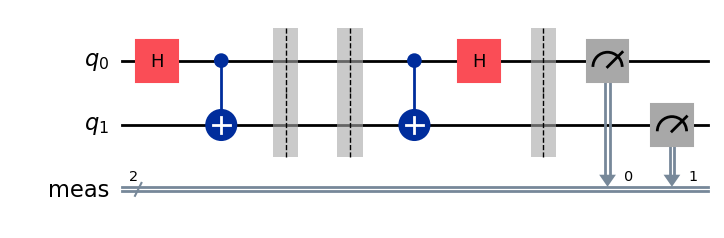

In [13]:
superdenceCoding_Circuit = createSuperdenceCodingCircuit("00")
%matplotlib inline
superdenceCoding_Circuit.draw(output='mpl')


Total counts are: {'00': 1024}


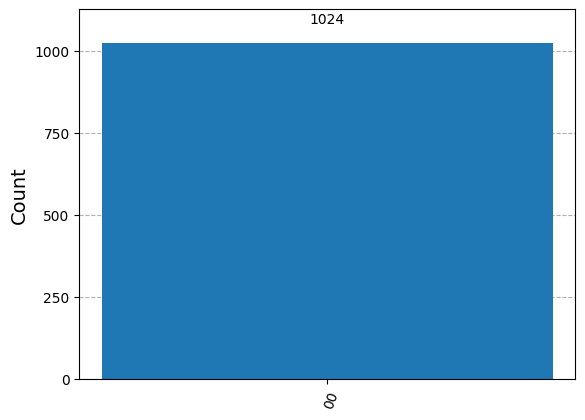

In [14]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(superdenceCoding_Circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

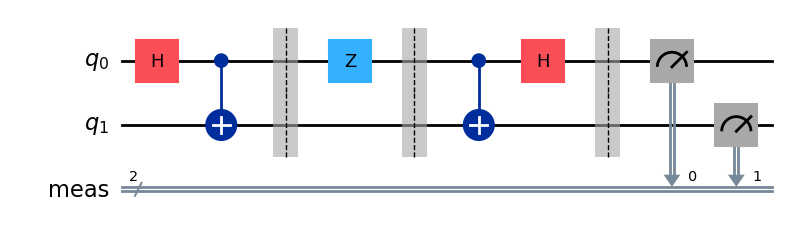

In [15]:
superdenceCoding_Circuit = createSuperdenceCodingCircuit("01")
%matplotlib inline
superdenceCoding_Circuit.draw(output='mpl')


Total counts are: {'01': 1024}


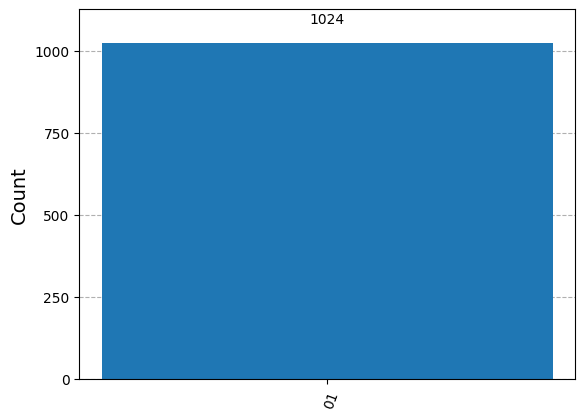

In [16]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(superdenceCoding_Circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

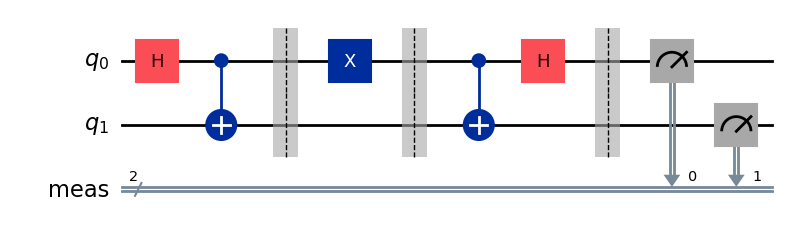

In [17]:
superdenceCoding_Circuit = createSuperdenceCodingCircuit("10")
%matplotlib inline
superdenceCoding_Circuit.draw(output='mpl')


Total counts are: {'10': 1024}


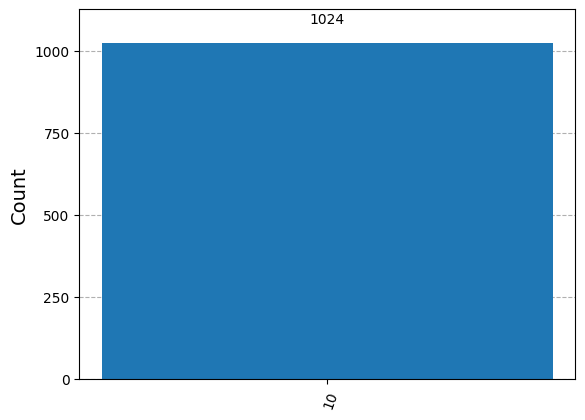

In [18]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(superdenceCoding_Circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

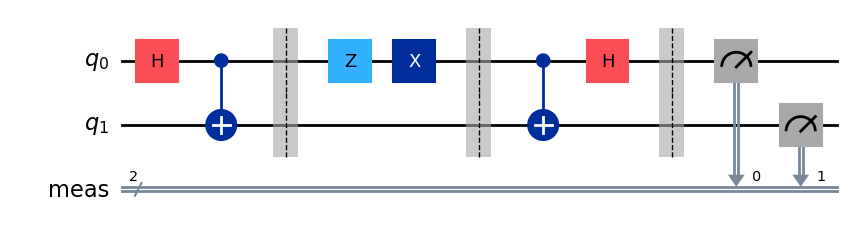

In [19]:
superdenceCoding_Circuit = createSuperdenceCodingCircuit("11")
%matplotlib inline
superdenceCoding_Circuit.draw(output='mpl')


Total counts are: {'11': 1024}


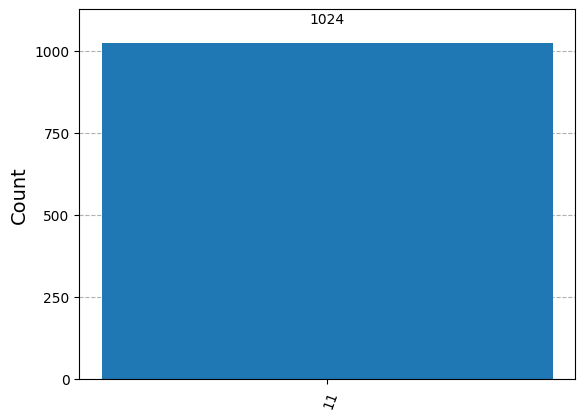

In [20]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(superdenceCoding_Circuit, backend)

# Grab results from the job
result = backend.run(compiled_circuit).result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)